In [ ]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

import matplotlib.pyplot as plt

In [3]:
# AIF TEST
file_path = "../data/300k_dataset.csv"
df = pd.read_csv(file_path)

target = 'checked'

bias_results = []

for feature in df.columns:
    if feature != target:

        df_aif = df[[target, feature]].copy()

        dataset = BinaryLabelDataset(
            df=df_aif,
            label_names=[target],
            protected_attribute_names=[feature]
        )

        metric = BinaryLabelDatasetMetric(
            dataset,
            privileged_groups=[{feature: 1}],
            unprivileged_groups=[{feature: 0}]
        )

        bias_results.append({
            "Feature": feature,
            "Statistical Parity Difference": metric.statistical_parity_difference(),
            "Disparate Impact": metric.disparate_impact(),
            "Mean Difference": metric.mean_difference()
        })

bias_df = pd.DataFrame(bias_results)

top_20_bias = bias_df.sort_values(by="Statistical Parity Difference", ascending=False).head(20)

output_file = "../data/top_20_biased_features.csv"
top_20_bias.to_csv(output_file, index=False)

output_file


C:\Users\tudda\anaconda3\envs\razer\lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)
C:\Users\tudda\anaconda3\envs\razer\lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)
C:\Users\tudda\anaconda3\envs\razer\lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)
C:\Users\tudda\anaconda3\envs\razer\lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)
C:\Users\tudda\anaconda3\envs\razer\lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value e

'top_20_biased_features.csv'

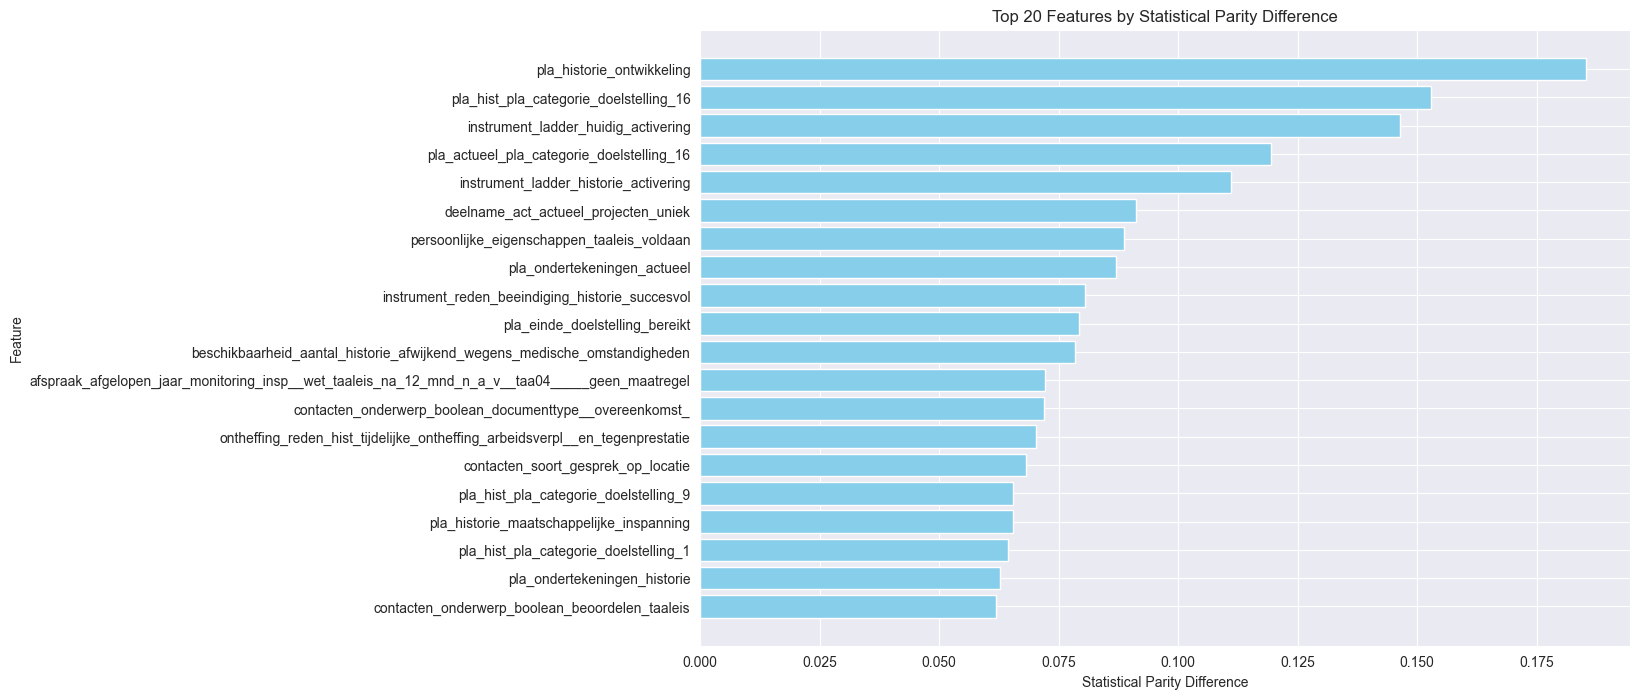

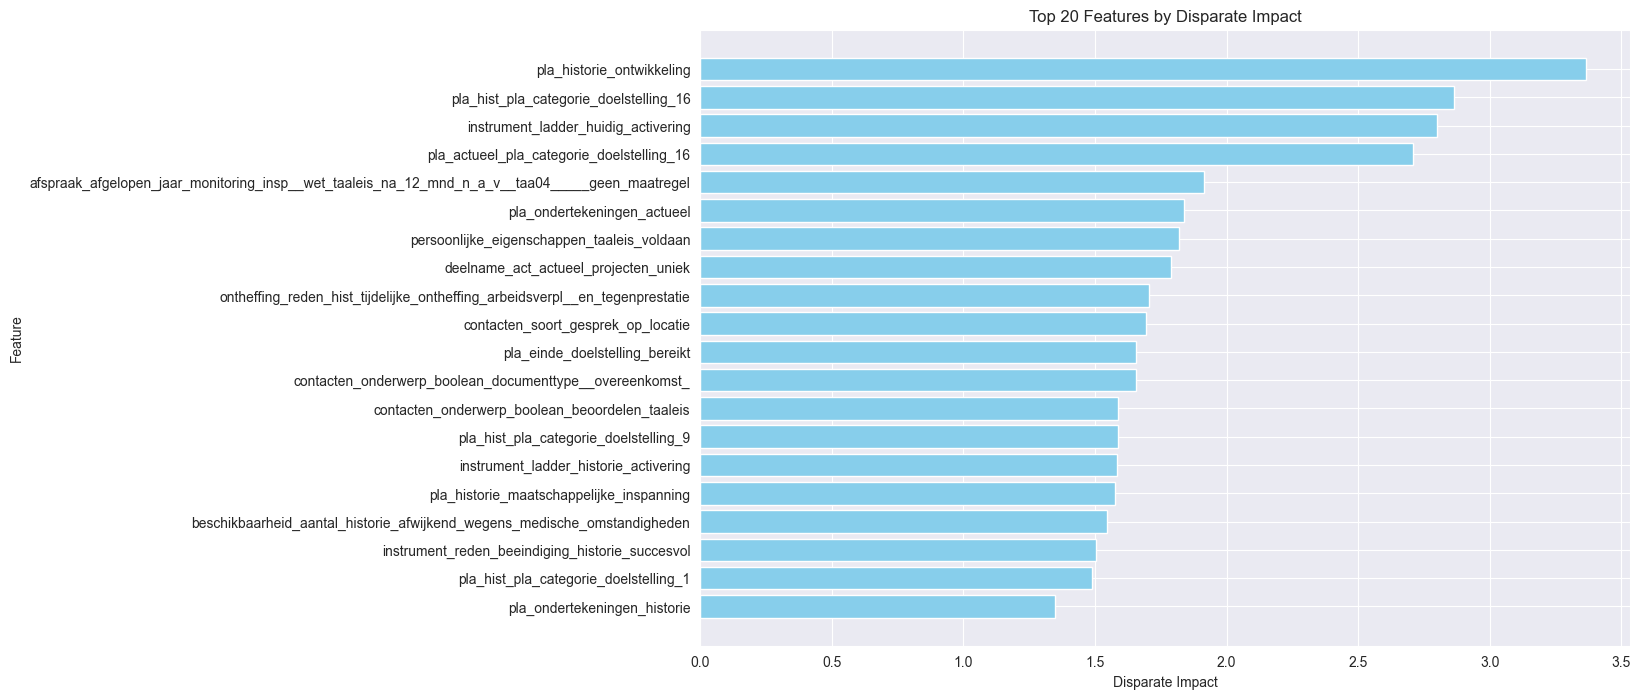

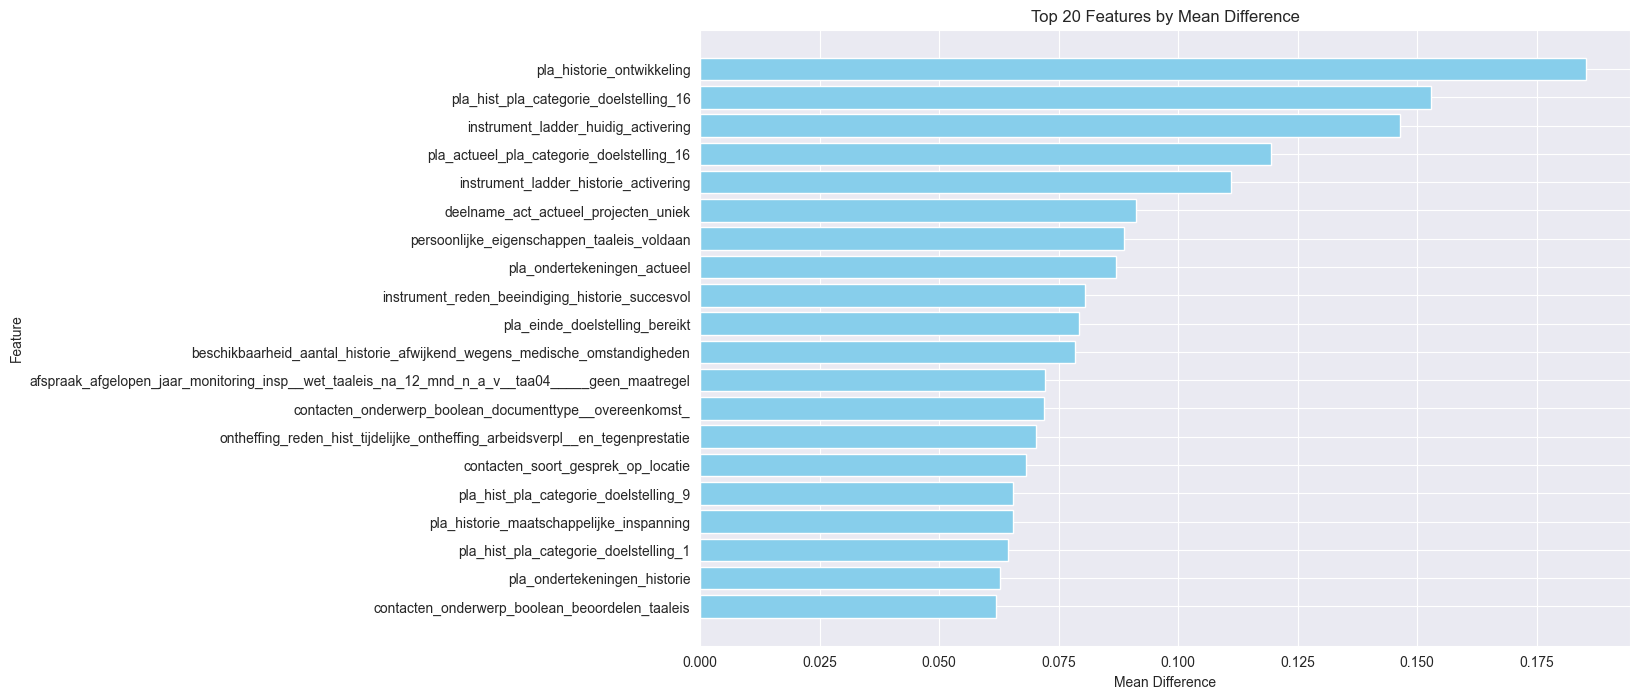

In [4]:
# Visualization
def plot_bias_metrics(df, metric, title, top_n=20):
    plt.figure(figsize=(12, 8))
    df_sorted = df.sort_values(by=metric, ascending=False).head(top_n)
    plt.barh(df_sorted["Feature"], df_sorted[metric], color='skyblue')
    plt.xlabel(metric)
    plt.ylabel("Feature")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

top_20_bias = pd.read_csv("top_20_biased_features.csv")

plot_bias_metrics(top_20_bias, "Statistical Parity Difference", "Top 20 Features by Statistical Parity Difference")
plot_bias_metrics(top_20_bias, "Disparate Impact", "Top 20 Features by Disparate Impact")
plot_bias_metrics(top_20_bias, "Mean Difference", "Top 20 Features by Mean Difference")

